# VAD

In [2]:
import sys
import os
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from scipy.io import wavfile

import seaborn as sns
sns.set()
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [23, 10]
plt.rcParams['axes.axisbelow'] = True
from statsmodels.graphics.mosaicplot import mosaic

In [6]:
fs, data = wavfile.read('/Users/ekervella/Dropbox/GitHub/vad/vad_data/19-198-0003.wav')

In [7]:
fs

16000

In [8]:
data

array([-67, -46, -57, ...,  71,  83,  93], dtype=int16)

In [9]:
print('Duration of the audio record: {} seconds'.format(len(data)/fs))

Duration of the audio record: 15.48 seconds


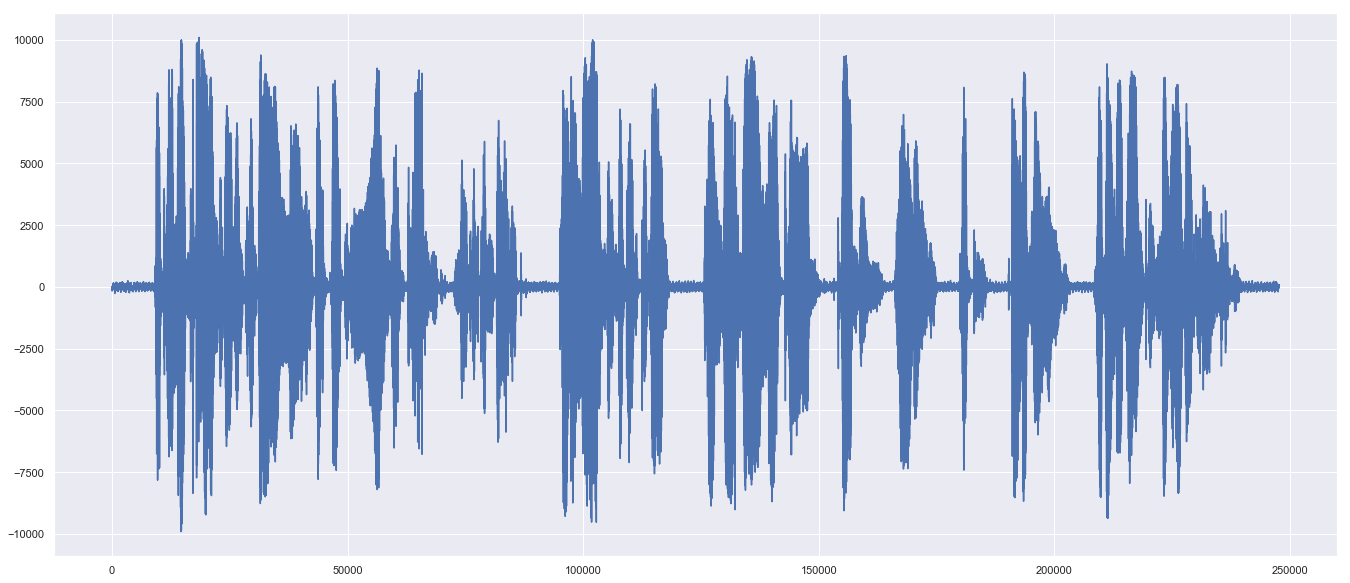

In [35]:
plt.plot(list(range(len(data))), data);

In [24]:
df.fds

AttributeError: 'DataFrame' object has no attribute 'fds'

In [23]:
df = pd.DataFrame({'value': data})
df['timestamp'] = df.index / fs
df['target'] = 0

In [155]:
df.head()

,value,timestamp,target
0,-67,0.000000,0
1,-46,0.000063,0
2,-57,0.000125,0
3,-50,0.000188,0
4,-62,0.000250,0


In [30]:
labels = pd.read_json('/Users/ekervella/Desktop/vad_data/19-198-0003.json')

In [42]:
labels.head()

,speech_segments
0,"{'start_time': 0.15, 'end_time': 0.30000000000..."
1,"{'start_time': 0.30000000000000004, 'end_time'..."
2,"{'start_time': 0.54, 'end_time': 0.68}"
3,"{'start_time': 0.68, 'end_time': 1.07}"
4,"{'start_time': 1.07, 'end_time': 1.47}"


In [159]:
targets = np.zeros(df.shape[0])

for idx, row in labels.iterrows():
    targets[df[(df['timestamp'] >= row['speech_segments']['start_time']) & (df['timestamp'] <= row['speech_segments']['end_time'])]['target'].index] = 1

df['target'] = targets.astype(int)

In [162]:
df = df.set_index('timestamp')

In [163]:
voice_ratio = sum(df.target)/df.shape[0]
wo_voice_ratio = 1-voice_ratio
print('Time without voice: {}%'.format(round(wo_voice_ratio*100, 2)))

Time without voice: 11.43%


In [169]:
df.head(20)

,value,target
timestamp,,
0.000000,-67,0.0
0.000063,-46,0.0
0.000125,-57,0.0
0.000188,-50,0.0
0.000250,-62,0.0
0.000313,-48,0.0
0.000375,-47,0.0
0.000438,-46,0.0
0.000500,-45,0.0


In [11]:
listdir = os.listdir('/Users/ekervella/Dropbox/GitHub/vad/vad_data')
listdir.sort()
wav_files = [f for f in listdir if f.endswith('.wav')]
json_files = [f for f in listdir if f.endswith('.json')]

In [25]:
print(wav_files[:4])
print(json_files[:4])

['103-1240-0001.wav', '103-1240-0005.wav', '103-1240-0010.wav', '103-1240-0024.wav']
['103-1240-0001.json', '103-1240-0005.json', '103-1240-0010.json', '103-1240-0024.json']


In [26]:
json_files[4].fds

AttributeError: 'str' object has no attribute 'fds'

In [18]:
from pathlib import Path
path_dir = Path('/Users/ekervella/Dropbox/GitHub/vad/vad_data').resolve(strict=True)

In [21]:
json_files.dtpye

AttributeError: 'list' object has no attribute 'dtpye'

In [22]:
df.dfs

NameError: name 'df' is not defined